In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [3]:
data = pd.read_csv('Train_data.csv')

data.head()

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [4]:
df=data.drop(columns='Warehouse id')


In [5]:
df.head()

,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,NORTH,SKU-1,27,13,30,14,22,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,NORTH,SKU-2,88,28,127,130,58,10,7,7,...,16,7,7,7,7,7,13,43,13,43
2,NORTH,SKU-3,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,NORTH,SKU-4,162,184,110,172,90,40,18,26,...,82,78,38,18,22,28,36,352,58,18
4,NORTH,SKU-5,171,402,627,615,300,417,141,42,...,468,216,75,6,30,66,141,699,183,24


In [6]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Region'])
# Drop column B as it is now encoded
df1 = df.drop('Region',axis = 1)
# Join the encoded df
df1 = df1.join(one_hot)
df1

,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,EAST,NORTH,SOUTH,WEST
0,SKU-1,27,13,30,14,22,8,8,8,8,...,8,8,14,16,8,12,0,1,0,0
1,SKU-2,88,28,127,130,58,10,7,7,7,...,7,7,13,43,13,43,0,1,0,0
2,SKU-3,6,6,6,6,6,6,6,6,6,...,6,6,6,8,26,6,0,1,0,0
3,SKU-4,162,184,110,172,90,40,18,26,18,...,22,28,36,352,58,18,0,1,0,0
4,SKU-5,171,402,627,615,300,417,141,42,72,...,30,66,141,699,183,24,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,SKU-229,7,7,7,7,7,7,7,7,7,...,135,239,295,7,7,135,0,0,1,0
1035,SKU-230,49,25,41,13,21,53,33,21,67,...,9,33,9,103,49,9,0,0,1,0
1036,SKU-231,21,13,13,21,29,21,21,29,13,...,13,21,13,13,13,13,0,0,1,0
1037,SKU-232,15,13,13,11,9,11,36,15,21,...,11,36,21,17,9,9,0,0,1,0


In [7]:
df2=df1.iloc[:,:-4]
#df2=df2.rename(columns={'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18','Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
 #      'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
  #     'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
   #    'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21',
    #   'Feb-21', 'Mar-21', 'Apr-21', 'May-21'}, inplace=True)

df2


,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,SKU-1,27,13,30,14,22,8,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,SKU-2,88,28,127,130,58,10,7,7,7,...,16,7,7,7,7,7,13,43,13,43
2,SKU-3,6,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,SKU-4,162,184,110,172,90,40,18,26,18,...,82,78,38,18,22,28,36,352,58,18
4,SKU-5,171,402,627,615,300,417,141,42,72,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,SKU-229,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,SKU-230,49,25,41,13,21,53,33,21,67,...,9,9,21,133,9,33,9,103,49,9
1036,SKU-231,21,13,13,21,29,21,21,29,13,...,13,13,13,13,13,21,13,13,13,13
1037,SKU-232,15,13,13,11,9,11,36,15,21,...,9,9,17,13,11,36,21,17,9,9


In [8]:
x=-1
for column in df2:
  df2=df2.rename(columns={str(column):x})
  x=x+1
  print(str(column))

SKU id
Apr-18
May-18
Jun-18
Jul-18
Aug-18
Sep-18
Oct-18
Nov-18
Dec-18
Jan-19
Feb-19
Mar-19
Apr-19
May-19
Jun-19
Jul-19
Aug-19
Sep-19
Oct-19
Nov-19
Dec-19
Jan-20
Feb-20
Mar-20
Apr-20
May-20
Jun-20
Jul-20
Aug-20
Sep-20
Oct-20
Nov-20
Dec-20
Jan-21
Feb-21
Mar-21
Apr-21
May-21


In [9]:
df2=df2.rename(columns={-1:"SKU id"})
df2

,SKU id,0,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
0,SKU-1,27,13,30,14,22,8,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,SKU-2,88,28,127,130,58,10,7,7,7,...,16,7,7,7,7,7,13,43,13,43
2,SKU-3,6,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,SKU-4,162,184,110,172,90,40,18,26,18,...,82,78,38,18,22,28,36,352,58,18
4,SKU-5,171,402,627,615,300,417,141,42,72,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,SKU-229,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,SKU-230,49,25,41,13,21,53,33,21,67,...,9,9,21,133,9,33,9,103,49,9
1036,SKU-231,21,13,13,21,29,21,21,29,13,...,13,13,13,13,13,21,13,13,13,13
1037,SKU-232,15,13,13,11,9,11,36,15,21,...,9,9,17,13,11,36,21,17,9,9


In [10]:
df2=df2.join(df['Region'])


In [11]:
df2

,SKU id,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,Region
0,SKU-1,27,13,30,14,22,8,8,8,8,...,8,8,8,8,8,14,16,8,12,NORTH
1,SKU-2,88,28,127,130,58,10,7,7,7,...,7,7,7,7,7,13,43,13,43,NORTH
2,SKU-3,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,8,26,6,NORTH
3,SKU-4,162,184,110,172,90,40,18,26,18,...,78,38,18,22,28,36,352,58,18,NORTH
4,SKU-5,171,402,627,615,300,417,141,42,72,...,216,75,6,30,66,141,699,183,24,NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,SKU-229,7,7,7,7,7,7,7,7,7,...,167,455,215,135,239,295,7,7,135,SOUTH
1035,SKU-230,49,25,41,13,21,53,33,21,67,...,9,21,133,9,33,9,103,49,9,SOUTH
1036,SKU-231,21,13,13,21,29,21,21,29,13,...,13,13,13,13,21,13,13,13,13,SOUTH
1037,SKU-232,15,13,13,11,9,11,36,15,21,...,9,17,13,11,36,21,17,9,9,SOUTH


In [12]:
melt = df2.melt(id_vars={'SKU id','Region'}, var_name='Month', value_name='Sales')
melt['SKU id'] = melt['SKU id'].str.extract('(\d+)', expand=False).astype(int)
#melt = melt.sort_values(['Month', 'SKU id'])
melt

,SKU id,Region,Month,Sales
0,1,NORTH,0,27
1,2,NORTH,0,88
2,3,NORTH,0,6
3,4,NORTH,0,162
4,5,NORTH,0,171
...,...,...,...,...
39477,229,SOUTH,37,135
39478,230,SOUTH,37,9
39479,231,SOUTH,37,13
39480,232,SOUTH,37,9


In [13]:
# Get one hot encoding of columns B
# one_hot = pd.get_dummies(melt['Region'])
# Drop column B as it is now encoded
# data1 = melt.drop('Region',axis = 1)
# Join the encoded df
data1=data1.join(one_hot)
data1

NameError: name 'data1' is not defined

In [31]:
melt4 = melt.copy()
melt4['Lag1'] = melt4.groupby(['SKU id','Region'])['Sales'].shift()
# melt4['Last_Week_Diff'] = melt4.groupby(['SKU id'])['Lag1'].diff()
melt4['Lag2'] = melt4.groupby(['SKU id','Region'])['Sales'].shift(2)
# melt4['Last-1_Week_Diff'] = melt4.groupby(['SKU id'])['Lag2'].diff(2)
melt4['Lag3'] = melt4.groupby(['SKU id','Region'])['Sales'].shift(3)
# melt4['Last-2_Week_Diff'] = melt4.groupby(['SKU id'])['Lag3'].diff(3)
#melt4['Lag4'] = melt4.groupby(['SKU id','Region'])['Sales'].shift(4)
melt4 = melt4.dropna()
melt4

,SKU id,Region,Month,Sales,Lag1,Lag2,Lag3
3117,1,NORTH,3,14,30.0,13.0,27.0
3118,2,NORTH,3,130,127.0,28.0,88.0
3119,3,NORTH,3,6,6.0,6.0,6.0
3120,4,NORTH,3,172,110.0,184.0,162.0
3121,5,NORTH,3,615,627.0,402.0,171.0
...,...,...,...,...,...,...,...
39477,229,SOUTH,37,135,7.0,7.0,295.0
39478,230,SOUTH,37,9,49.0,103.0,9.0
39479,231,SOUTH,37,13,13.0,13.0,13.0
39480,232,SOUTH,37,9,9.0,17.0,21.0


In [32]:
one_hot = pd.get_dummies(melt4['Region'])
data1 = melt4.drop('Region',axis = 1)
data1=data1.join(one_hot)
data1
melt4=data1

In [33]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [34]:
melt4['Month']=melt4['Month'].astype(int)

In [35]:
melt4

,SKU id,Month,Sales,Lag1,Lag2,Lag3,EAST,NORTH,SOUTH,WEST
3117,1,3,14,30.0,13.0,27.0,0,1,0,0
3118,2,3,130,127.0,28.0,88.0,0,1,0,0
3119,3,3,6,6.0,6.0,6.0,0,1,0,0
3120,4,3,172,110.0,184.0,162.0,0,1,0,0
3121,5,3,615,627.0,402.0,171.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
39477,229,37,135,7.0,7.0,295.0,0,0,1,0
39478,230,37,9,49.0,103.0,9.0,0,0,1,0
39479,231,37,13,13.0,13.0,13.0,0,0,1,0
39480,232,37,9,9.0,17.0,21.0,0,0,1,0


In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mean_error = []
a = []
for week in range(36,38):
    train = melt4[melt4['Month'] < week]
    val = melt4[melt4['Month'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values

    mdl = LGBMRegressor(n_estimators=1500, learning_rate=0.05,  )
    mdl.fit(xtr, ytr)

    p = np.round(mdl.predict(xts),decimals=0)
#    error = rmsle(yts, p)
#    error_r2=r2_score(yts,p)
    error = mean_absolute_percentage_error(yts,p)
    print('Week %d - Error %.5f' % (week, error))
    a.append((p,yts))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 36 - Error 16.90713
Week 37 - Error 5.81350
Mean Error = 11.36032


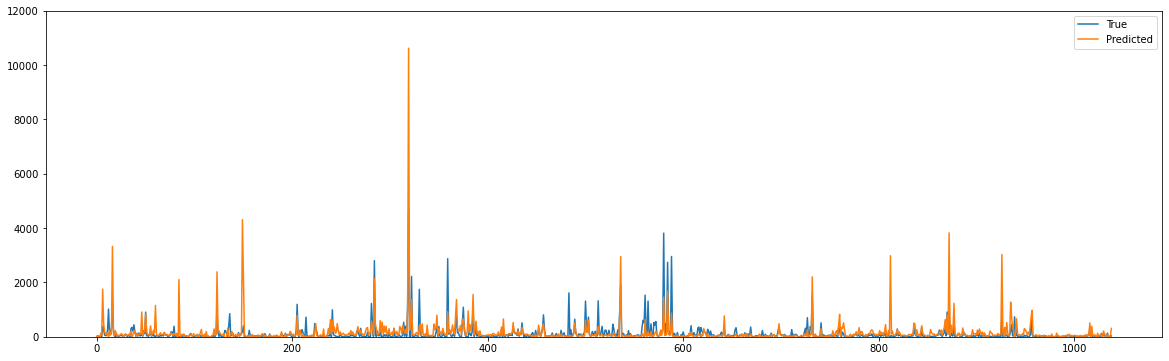

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=((20,6)))
plt.plot(yts)
plt.plot(p)
plt.ylim(0,12000)
plt.legend(["True", "Predicted"])

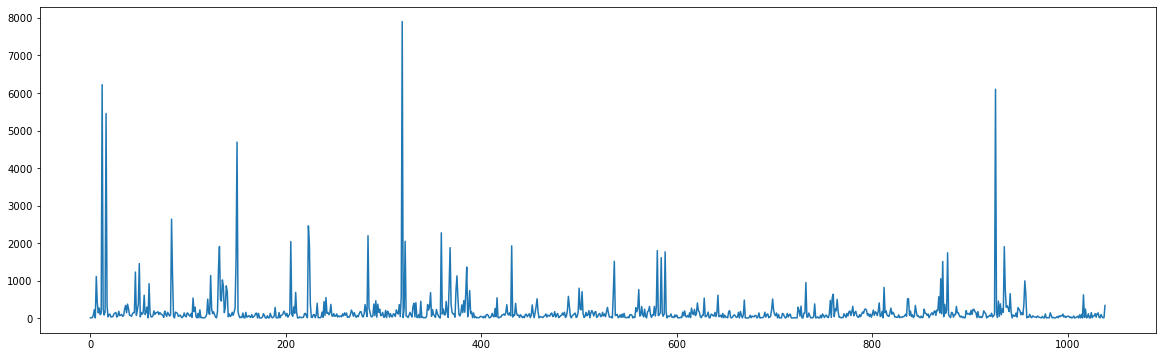

In [54]:
plt.figure(figsize=((20,6)))
plt.plot(p)

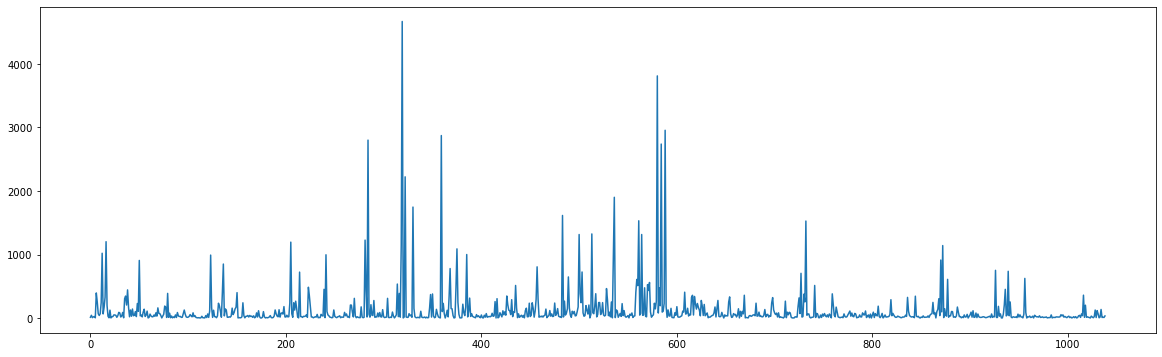

In [55]:
plt.figure(figsize=((20,6)))
plt.plot(yts)

In [51]:
p = np.expm1(mdl.predict(xts))
pn_jobs=4

<ipython-input-51-92109b52b761>:1: RuntimeWarning: overflow encountered in expm1
  p = np.expm1(mdl.predict(xts))


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
mean_error = []
for week in range(32,37):
    train = melt4[melt4['Month'] < week]
    val = melt4[melt4['Month'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values
print (train)

       SKU id  Month  Sales   Lag1   Lag2   Lag3  EAST  NORTH  SOUTH  WEST
3117        1      3     14   30.0   13.0   27.0     0      1      0     0
3118        2      3    130  127.0   28.0   88.0     0      1      0     0
3119        3      3      6    6.0    6.0    6.0     0      1      0     0
3120        4      3    172  110.0  184.0  162.0     0      1      0     0
3121        5      3    615  627.0  402.0  171.0     0      1      0     0
...       ...    ...    ...    ...    ...    ...   ...    ...    ...   ...
37399     229     35      7  295.0  239.0  135.0     0      0      1     0
37400     230     35    103    9.0   33.0    9.0     0      0      1     0
37401     231     35     13   13.0   21.0   13.0     0      0      1     0
37402     232     35     17   21.0   36.0   11.0     0      0      1     0
37403     233     35    783  327.0  423.0  225.0     0      0      1     0

[34287 rows x 10 columns]


In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtr, ytr) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, xts, yts):
    predictions = model.predict(xts)
    errors = abs(predictions - yts)
    mape = 100 * np.mean(errors / yts)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(xtr, ytr)
base_accuracy = evaluate(base_model, xts, yts)

In [58]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, xts, yts)

Model Performance
Average Error: 240.0212 degrees.
Accuracy = -1260.16%.


In [60]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / -base_accuracy))

Improvement of 14.22%.
